In [4]:
import os
import tqdm

import matplotlib.pyplot as plt
import numpy as np

In [5]:
classes = {'person': 0,
           'rider': 1,
           'car': 2,
           'truck': 3,
           'bus': 4,
           'train': 5,
           'motor': 6,
           'bike': 7,
           'traffic light': 8,
           'traffic sign': 9
        }

In [4]:
# DIR_PATH = '/nfs-home/Prepare_BDD100K_in_the_YOLO_format/YOLO_Labels/'
DIR_PATH = '/nfs-home/Prepare_BDD100K_in_the_YOLO_format/YOLO_Labels_val/'

""" Contains numbers of images per class """
distr_image = {'person': 0,
               'rider': 0,
               'car': 0,
               'truck': 0,
               'bus': 0,
               'train': 0,
               'motor': 0,
               'bike': 0,
               'traffic light': 0,
               'traffic sign': 0
}


""" Displays the distribution of classes on a bar plot  """

def display_dist(distr_image):
    colors = np.random.rand(10,3)

    for class_name in distr_image:
        value = distr_image[class_name]
        number = classes[class_name]
        plt.bar([number], [value], label=str(class_name), color = colors[number] ,width=0.2)

    plt.legend()
    plt.xlabel('Classes')
    plt.ylabel('Images')
    plt.title('Distributions')

    # Print the chart
    plt.show()


""" Show the final distribution """

def show_distrib(distribution):
    for key in distribution:
        print(f'{key}: {distribution[key]}')



""" Updates the actual number of images in the class """

def update_distr(sorted_classes):
    for name_class in sorted_classes:
        for key in classes:
            if name_class == classes[key]:
                distr_image[key] += 1
    return
  


""" Sorting non-repeating classes  """

def sort_classes(classes):
    sorted_classes = []
    [sorted_classes.append(name_class) for name_class in classes if not name_class in sorted_classes]
    update_distr(sorted_classes)


    
""" Collects class numbers from a .txt file """
#-- Return array with classes --#

def collect_classes(PATH):
    for file in tqdm.tqdm(os.listdir(PATH)):
        classes = []
        if file.endswith('.txt'):
            with open(file, 'r') as f:
                for lines in f.readlines():
                    classes.append(int(lines[0]))
            sort_classes(classes)
        continue    
            
            
def main():
    collect_classes(DIR_PATH)
    show_distrib(distr_image)

    

if __name__ == '__main__':
    main()

# Distribution on a bar plot

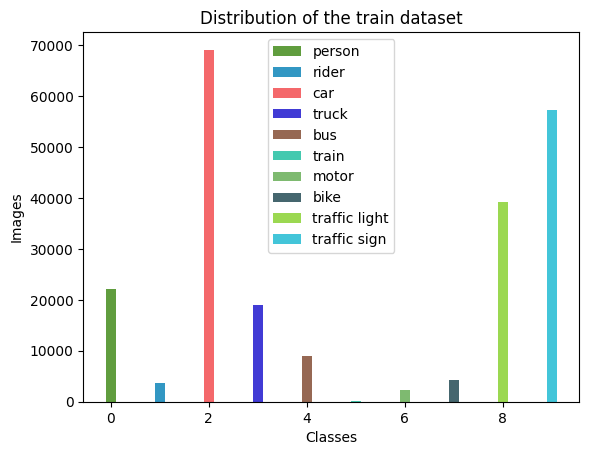

In [11]:
""" Displays the distribution of classes on a bar plot """
display_dist(distr_image)

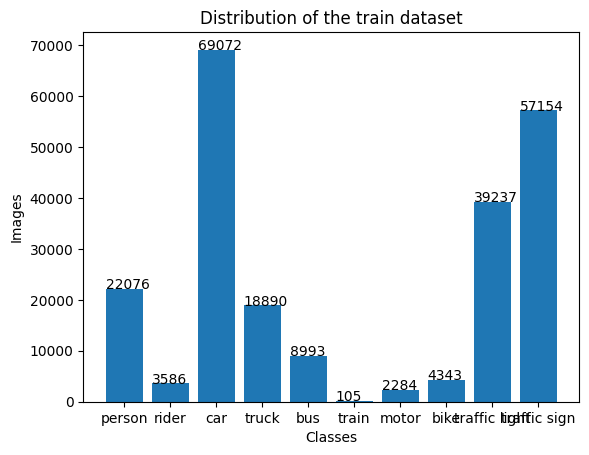

In [6]:
""" Second one chart """
#-- Source: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/ --#

# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.4,y[i],y[i])
if __name__ == '__main__':
 
    x,y = [],[];
    for class_name in distr_image:
        x.append(class_name)
    for class_name in distr_image:
        y.append(distr_image[class_name])
      
    # making the bar chart on the data
    plt.bar(x, y)
    # calling the function to add value labels
    addlabels(x, y) 
    
    # giving title to the plot
    plt.title("Distribution of the train dataset")
    # giving X and Y labels
    plt.xlabel("Classes")
    plt.ylabel("Images")
    # visualizing the plot
    plt.savefig('distribution_of_the_train_dataset.png',dpi=400)
    plt.show()